**Applied Empirical Analysis (HS 2020)**

**Conny Wunsch, Ulrike Unterhofer and Véra Zabrodina** -- University of Basel

***

# Lab Session 4 - Regression Discontinuity Design (RDD)

***

Key ingredients for a sharp RDD
* Institutional rules imply that treatment probability jumps at cut-off value $\bar{x}$ of some quasi-continuous covariate $X_i$.
* $X_i$ is called the running variable (or also assignment variable, forcing variable, or score).
* Cut-off is strictly enforced and everyone at one side of the cut-off is subject to the treatment ($D=1$, treated) and everyone on the other side is not ($D=0$, control).

$$D_i=D(X_i)=\underline{1}(X_i\ge\bar{x})$$

$$Pr(D_i=1|X_i<\bar{x})=0$$ 

$$Pr(D_i=1|X_i\ge\bar{x})=1$$

* Units around the cut-off are comparable. 
* No overlap in $X_i$ (i.e. no common support) between treated and control by construction.


![](./RDD1.JPG)



## Application: Islamic Rule and the Empowerment of the Poor and Pious 

**Meyersson E. (Econometrica, 2014)**

This paper is also discussed and replicated by Cattaneo, Idrobo and Titiunik (2019) (henceforth CIT). For further details and references for replication:

https://github.com/rdpackages-replication/CIT_2019_CUP

https://rdpackages.github.io/references/Cattaneo-Idrobo-Titiunik_2019_CUP.pdf

## 1. Introduction

* What is the research question?
* Why is it interesting?
* What is the treatment? The outcome(s) of interest? 
* Why can you not just regress the outcome on the treatment, i.e. what is the endogeneity problem? 


***

## 2. Identification strategy and assumptions



### Setup and notation

Plurality system in municipal elections: the party with the highest share of votes wins. 

Sharp RDD where the running variable $X_i$ is the margin of victory of the Islamic party in the election of 1994.

This margin is the difference between actual share of votes, and the largest secular party, and lies between -100 and 100 (in the paper, in percentage points between -1 and 1). 

Compare municipalities just above vs. just below  the win cut-off of 0. 


* $Y_i$ outcome: high school completion rates among women
* $X_i$ running variable (not covariates!): win margin 
* $D_i$ treatment : Islamic rule 
    * Treated group ($D_i = 1$): municipalities where the Islamic party was elected, i.e. where $X_i \geq 0$.
    * Control group ($D_i = 0$): municipalities where another secular party was elected, i.e. where $X_i < 0$. 



### Discussion of assumptions

* What do these assumptions mean in words?
* What could invalidate them? Think of concrete examples or mechanisms.
* Which arguments or empirical evidence can you provide to support that they hold?


**A1: Stable unit treatment value assumption (SUTVA)**

$Y_{i}=D_{i}Y^*_{1,i}+(1-D_{i})Y^*_{0,i}$


**A2: Local continuity**

$E[Y^*_{0,i}|X_i=x]$ and $E[Y^*_{1,i}|X_i=x]$ are continuous in $x$ at $\bar{x}$

![](./RDD2.JPG)

where $\tau_{SRD}$ is the **local** treatment effect.


What does it imply for extrapolation?

![](./RDD3.JPG)

Note: $E[Y(0)|X]$ corresponds to $E[Y^*_{0,i}|X_i=x]$, and similarly for $E[Y(1)|X]$.


***

## 3. Data

Aggregate data on municipalities in Turkey in 1994 and 2000. 

* What is the unit of observation? 

* What is the time unit? 

* Is the running variable precisely measured? 

In this replication, we will focus on women.

|variable name |   description |
|----:|----:|
| X              | Islamic Margin of Victory |
| Y              | Female High School percentage |
| D              | Islamic rule |
| ageshr19       | Percentage of population below 19 in 2000 |
| ageshr60       | Percentage of population above 60 in 2000 |
| buyuk          | Metro center |
| hischshr1520m  | Percentage of men aged 15-20 with high school education |
| i89            | Islamic Mayor in 1989 |
| lpop1994       | Log population in 1994 |
| merkezi        | District center |
| merkezp        | Province center |
| partycount     | Number of parties receiving votes 1994 |
| prov_num       | Province number    |
| sexr           | Gender ratio in 2000 |
| shhs           | Household size in 2000 |
| subbuyuk       | Sub-metro center |
| vshr_islam1994 | Islamic percentage of votes in 1994 |

***

## Load packages

Special packages: `rdrobust` and `rdd`. Dcumentation:
https://rdpackages.github.io/rdrobust/

In [225]:
packages_vector <- c("haven", "dplyr", "tidyr", "sandwich", 
                     "expss", "fBasics", "xtable", "data.table", 
                     "stargazer", "mfx", "jtools", "ggplot2")
# install.packages(packages_vector)
lapply(packages_vector, require, character.only = TRUE) 

# RDD-specific packages 
packaged_vector_rdd <- c("grid", "lpdensity", "rddensity", 
                         "rdlocrand", "rdrobust", "TeachingDemos", "rdd")
# install.packages(packages_vector)
lapply(packaged_vector_rdd, require, character.only = TRUE) 

# List loaded packages 
(.packages())

print('All packages successfully installed and loaded.')

[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

Loading required package: rdd

Warning message:
"package 'rdd' was built under R version 3.6.3"
Loading required package: AER

Warning message:
"package 'AER' was built under R version 3.6.3"
Loading required package: car

Warning message:
"package 'car' was built under R version 3.6.3"
Loading required package: carData


Attaching package: 'car'


The following object is masked from 'package:fBasics':

    densityPlot


The following object is masked from 'package:expss':

    recode


The following object is masked from 'package:dplyr':

    recode


Loading required package: survival

Warning message:
"package 'survival' was built under R version 3.6.3"
Loading required package: Formula



[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[1] "rdd"           "Formula"       "AER"           "survival"     
 [5] "car"           "carData"       "TeachingDemos" "rdrobust"     
 [9] "rdlocrand"     "rddensity"     "lpdensity"     "grid"         
[13] "ggplot2"       "jtools"        "mfx"           "betareg"      
[17] "MASS"          "lmtest"        "zoo"           "stargazer"    
[21] "data.table"    "xtable"        "fBasics"       "timeSeries"   
[25] "timeDate"      "expss"         "sandwich"      "tidyr"        
[29] "dplyr"         "haven"         "stats"         "graphics"     
[33] "grDevices"     "utils"         "datasets"      "methods"      
[37] "base"

[1] "All packages successfully installed and loaded."


## Load data 

In [226]:
data <-as.data.frame(read_dta("data_meyersson.dta"))

head(data)

,X,Y,D,ageshr19,ageshr60,buyuk,hischshr1520m,i89,lpop1994,merkezi,merkezp,partycount,prov_num,sexr,shhs,subbuyuk,vshr_islam1994
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl+lbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-35.60663,22.96296,0,42.20857,7.506742,0,37.93103,0,7.996990,1,0,6,1,97.74815,4.670399,0,1.5448381
2,-54.34782,25.43860,0,44.09879,6.340537,0,30.89005,0,7.362645,0,0,4,1,112.03424,6.813916,0,2.5135870
3,-20.40923,22.68273,0,43.54768,5.539970,1,22.62840,0,13.175261,1,0,14,1,97.46254,4.389300,0,11.1114979
4,-44.97206,15.85366,0,43.86755,6.649007,0,17.11712,0,7.623153,0,0,6,1,102.52145,5.510949,0,5.5865922
5,-20.11494,18.23899,0,41.81067,5.447032,0,17.31343,0,7.647786,0,0,7,1,118.10733,6.234192,0,10.1880875
6,-50.58997,25.00000,0,40.53058,6.963891,0,26.56250,NA,7.312553,0,0,5,1,101.78439,6.004425,0,0.5899705


In [227]:
# Vector with all variable names
varnames <- colnames(data)

# Store each variable in own R object
attach(data)

# Options for RD plots
options(repr.plot.width=5, repr.plot.height=4, repr.plot.res = 230)
par(mar = rep(2, 4))
xlabel <- "Islamic Margin of Victory"
ylabel <- "Female High School percentage"
dlabel <- "Islamic rule"

The following objects are masked from data (pos = 9):

    ageshr19, ageshr60, buyuk, D, hischshr1520m, i89, lpop1994,
    merkezi, merkezp, partycount, prov_num, sexr, shhs, subbuyuk,
    vshr_islam1994, X, Y


The following objects are masked from data (pos = 10):

    ageshr19, ageshr60, buyuk, D, hischshr1520m, i89, lpop1994,
    merkezi, merkezp, partycount, prov_num, sexr, shhs, subbuyuk,
    vshr_islam1994, X, Y


The following objects are masked from data (pos = 11):

    ageshr19, ageshr60, buyuk, D, hischshr1520m, i89, lpop1994,
    merkezi, merkezp, partycount, prov_num, sexr, shhs, subbuyuk,
    vshr_islam1994, X, Y


The following objects are masked from data (pos = 12):

    ageshr19, ageshr60, buyuk, D, hischshr1520m, i89, lpop1994,
    merkezi, merkezp, partycount, prov_num, sexr, shhs, subbuyuk,
    vshr_islam1994, X, Y


The following objects are masked from data (pos = 13):

    ageshr19, ageshr60, buyuk, D, hischshr1520m, i89, lpop1994,
    merkezi, merkezp, partyco

***

## Descriptive statistics and validity checks

### Summary statistics by treatment group

Number of treated and control

In [228]:
cro(D)

,,#Total
Islamic rule,0,2314
,1,315
,#Total cases,2629


Table 1 in Meyersson

In [229]:
# Function for table display
repr_html.xtable <- function(obj, ...){
    paste(capture.output(print(obj, type = 'html')), collapse="", sep="")
}

# Define a function estimating the differences in variables across D
balance_check <- function(x){
    
    # Observations
    nobs<-nrow(x)
    
    # Conditional means
    mean_d0 <- mean(x[data$D==0], na.rm=TRUE)
    mean_d1 <- mean(x[data$D==1], na.rm=TRUE)
    
    # Difference in means
    diff_d <- lm(x ~ data$D)
    cov <- vcovHC(diff_d, type = "HC")
    robust.se <- sqrt(diag(cov))
    
    list(mean_d0 = mean_d0, 
         mean_d1 = mean_d1,
         coeff = diff_d$coefficients[2], 
         robust.se = robust.se[2], 
         pval = 2*pnorm(-abs(diff_d$coefficients[2]/robust.se[2]))
        )             
}

diff_output <- apply(data, 2, balance_check)

# convert list to table
diff_output<-rbindlist(diff_output)
rownames(diff_output)<- varnames
colnames(diff_output)<- c("E(X|D=0)", "E(X|D=1)", 
                          "Difference", "s.e.", 
                          "p-value")

# plot table
print("Difference in means by treatment status")
xtable(diff_output, digits=3)

[1] "Difference in means by treatment status"


,E(X|D=0),E(X|D=1),Difference,s.e.,p-value
X,-33.370,10.275,43.645,0.707,0.000
Y,16.615,14.037,-2.577,0.545,0.000
D,0.000,1.000,1.000,0.000,0.000
ageshr19,39.964,44.528,4.564,0.457,0.000
ageshr60,9.487,7.270,-2.218,0.194,0.000
buyuk,0.004,0.019,0.015,0.008,0.052
hischshr1520m,19.187,19.610,0.423,0.459,0.357
i89,0.021,0.151,0.130,0.024,0.000
lpop1994,7.775,8.315,0.540,0.102,0.000
merkezi,0.338,0.394,0.056,0.029,0.057


### Existence of discontinuity: Plot D against X

In a sharp RDD, treatment assignment should jump from 0 to 1 at the cut-off. 

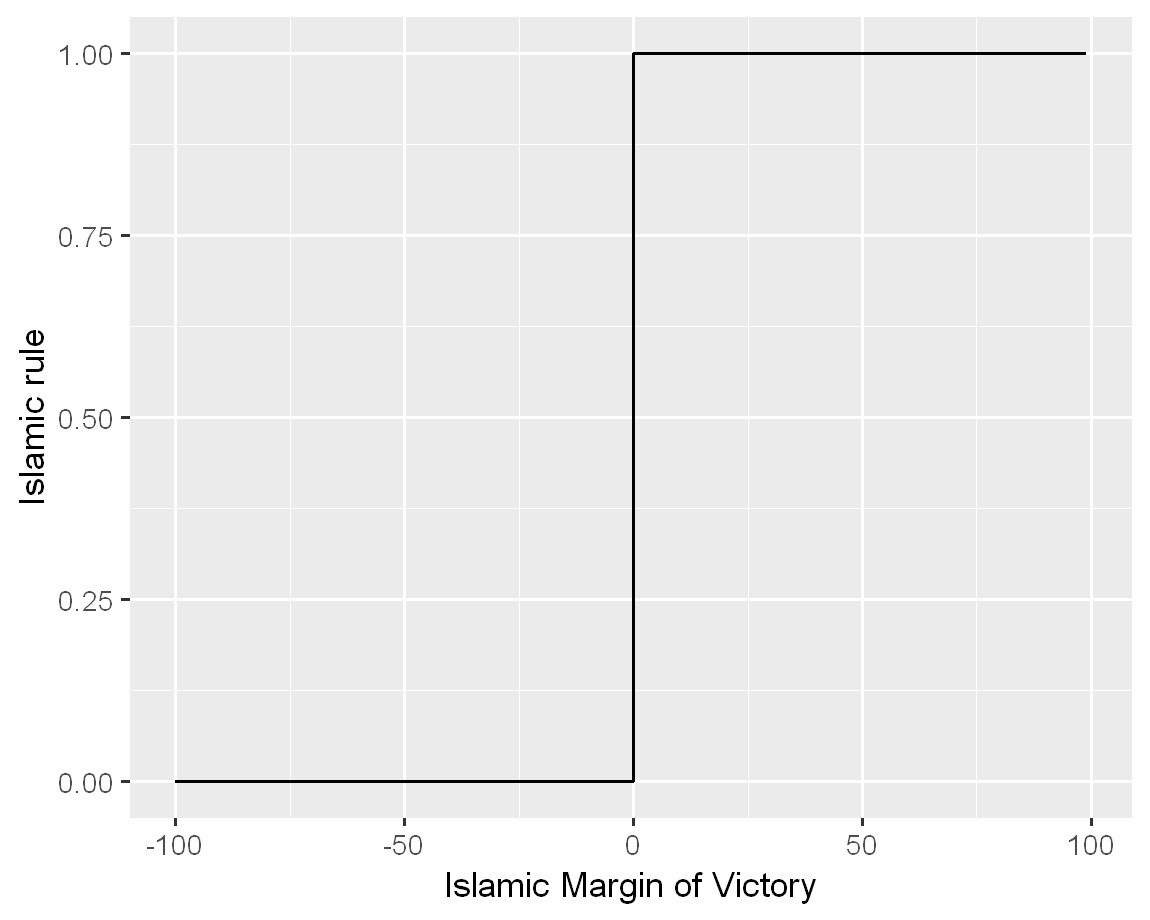

In [230]:
ggplot(data, aes(x = X, y = D)) +
        geom_line() +
        xlab(xlabel) +
        ylab(dlabel) 

### Descriptive evidence of effect: plot Y against X

Figure 3a in CIT - Raw comparison of means (no polynomial), across all observations 

Bins = number of observation groups. Here, each observation plotted on its own (number of bins set to be larger than actual number of observations). 

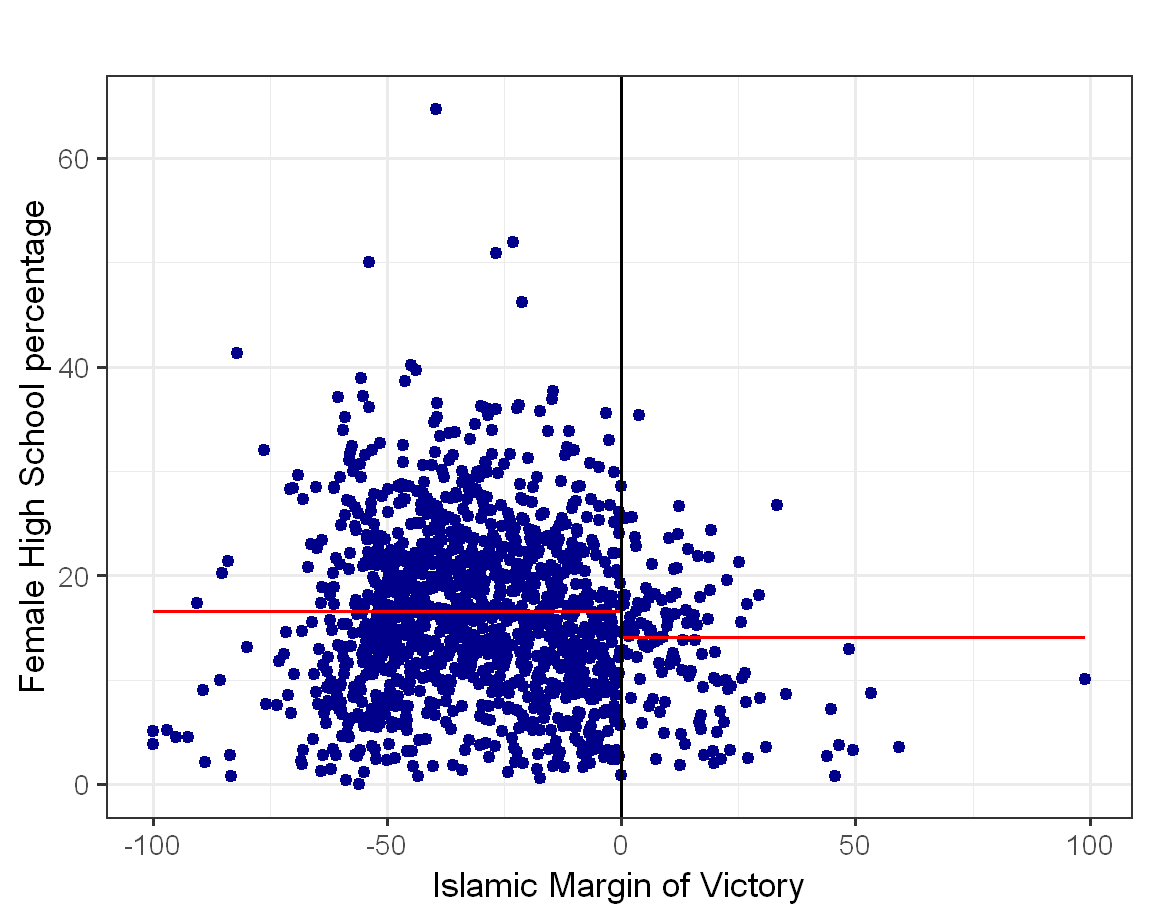

In [231]:
rdplot(Y, X, nbins = c(2500,500), p = 0, 
       title = "", x.label = xlabel, y.label = ylabel)

Try with fewer bins for illustration

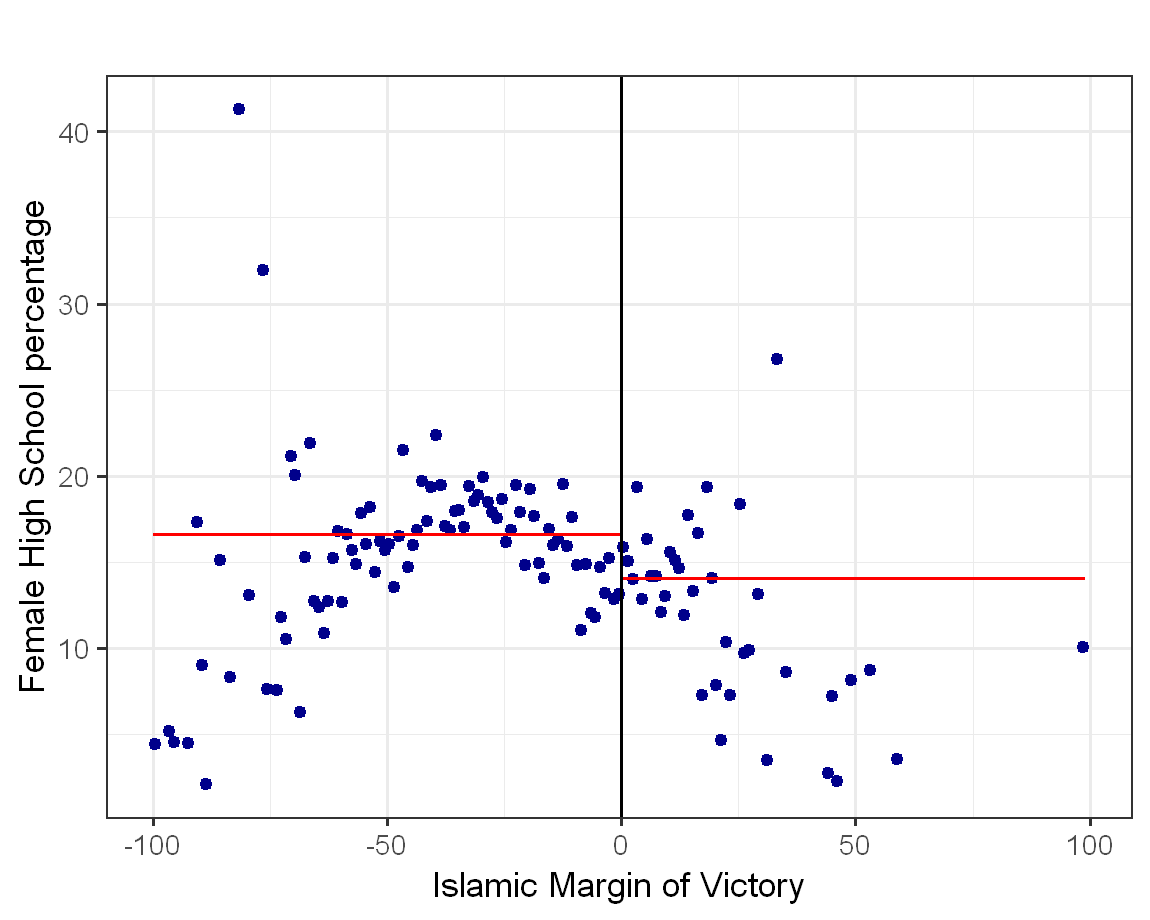

In [232]:
rdplot(Y, X, nbins = c(100,100), p = 0, 
       title = "", x.label = xlabel, y.label = ylabel)

Figure 3b in CIT - Within 50 percentage points bandwidth only, and a 4th degree polynomial fit.

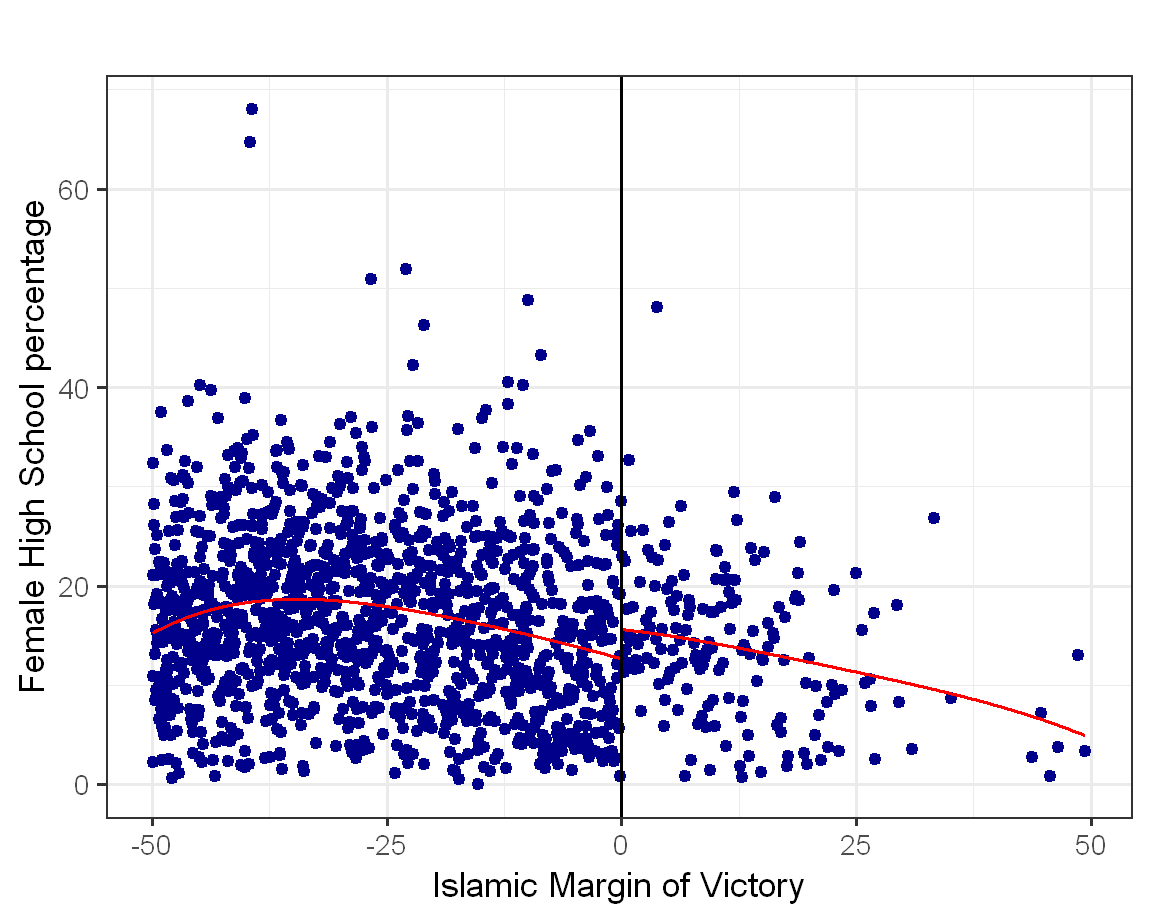

In [233]:
rdplot(Y[abs(X) <= 50], X[abs(X) <= 50], 
       nbins = c(2500, 500), p = 4, 
       title = "", x.label = xlabel, y.label = ylabel)

Once you "zoom in", the effect looks different!

###  No sorting in X: plot histogram of X 

Histogram - Figure 19a in CIT 2019, and Figure 2(a) in Meyersson 2014


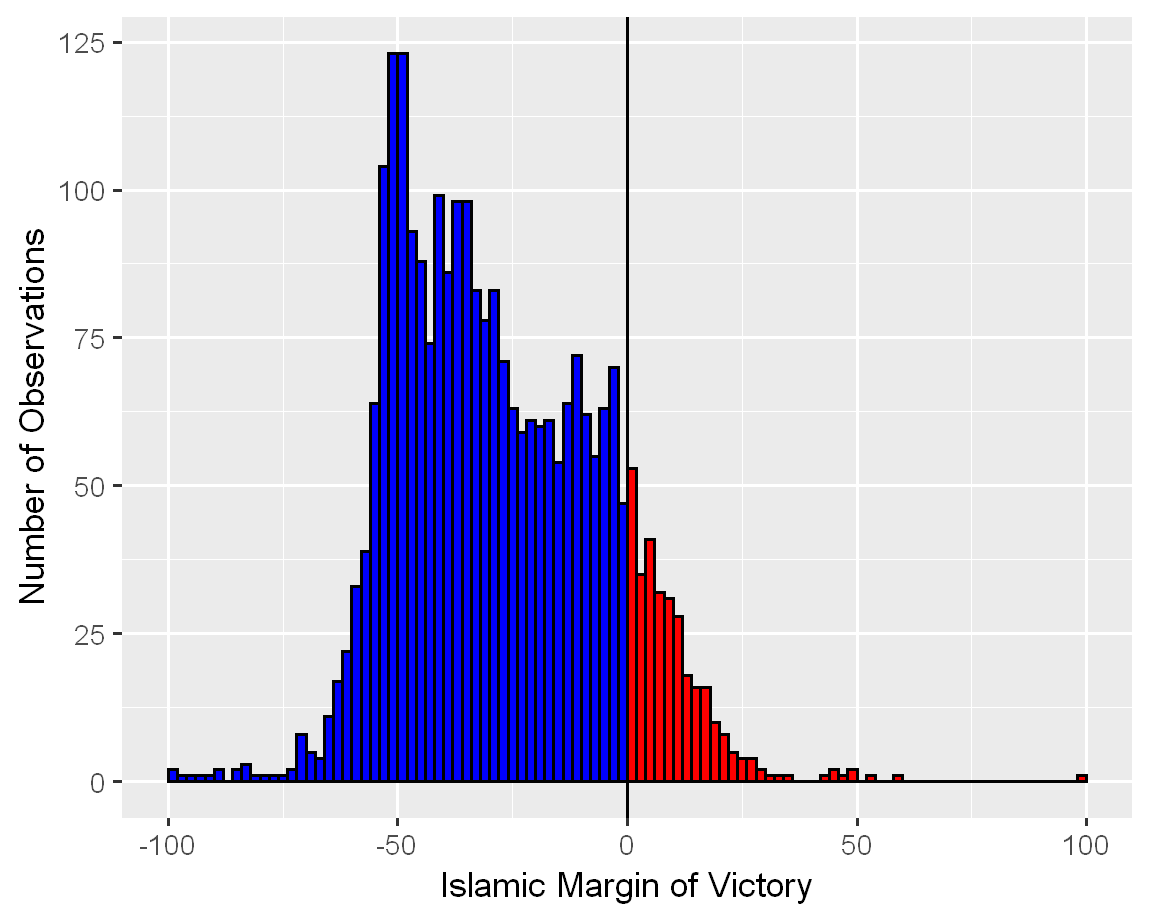

In [234]:
# Specify bandwidth manually 
# Useful to plot across the full range of possible values of the running variable 
bw <- as.numeric(100)

ggplot(data=data, aes(X)) + 
  geom_histogram(data = data, aes(x = X, y= ..count..), 
                 breaks = seq(-bw, 0, 2), fill = "blue", col = "black", alpha = 1) +
  geom_histogram(data = data, aes(x = X, y= ..count..), 
                 breaks = seq(0, bw, 2), fill = "red", col = "black", alpha = 1) +
  labs(x = xlabel, y = "Number of Observations") + 
  geom_vline(xintercept = 0, color = "black") 

What should you not see? 

What if you discover that the vote was rigged in some municipalities?

###  No sorting in X: plot density of X and test for discontinuities in density 

Density - Figure 2(b) in Meyersson 

Using calculated bin size:  0.863 
Using calculated bandwidth:  16.490 
Log difference in heights is  -0.093  with SE  0.149 
  this gives a z-stat of  -0.626 
  and a p value of  0.531 


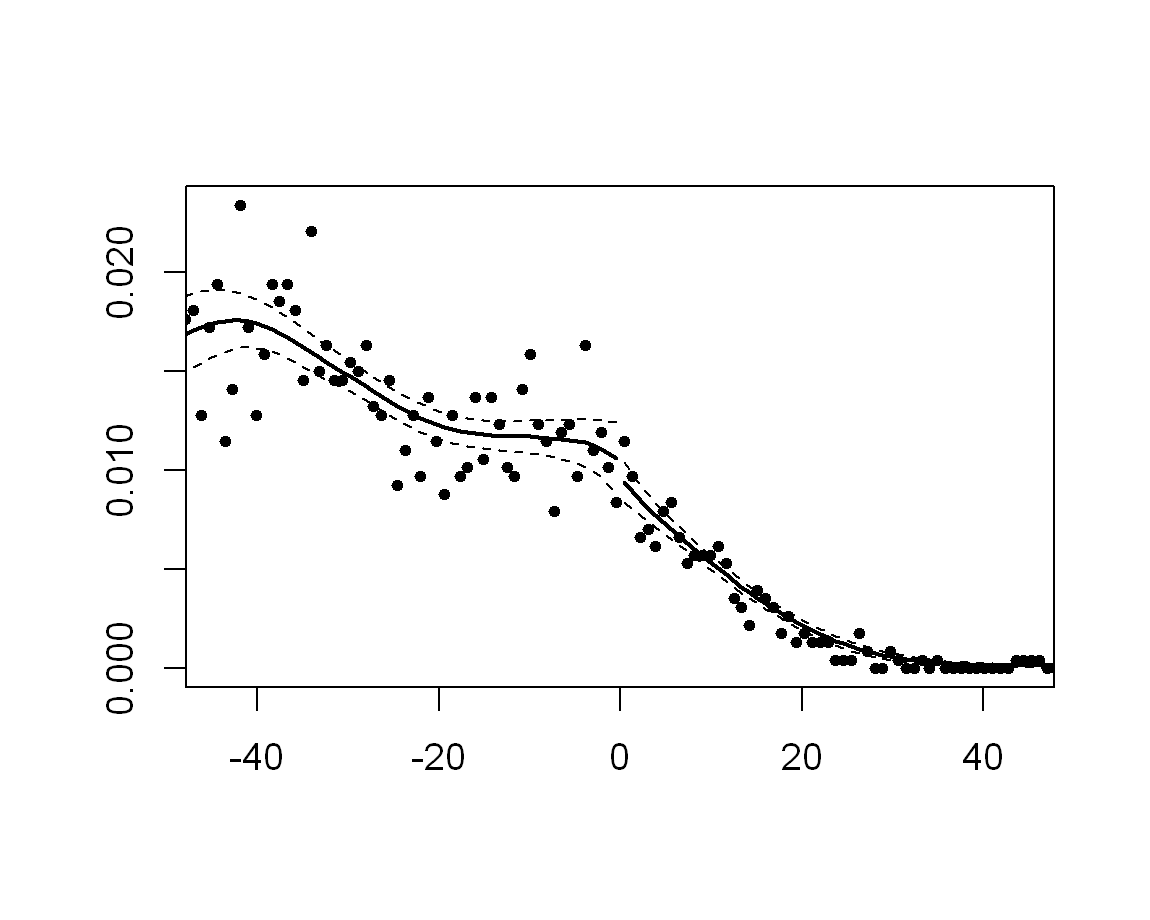

In [235]:
out<- DCdensity(X, cutpoint=0, plot=TRUE, verbose=TRUE)

Here, cannot reject the null hypothesis of no manipulation.

### No sorting in covariates: plot covariates against $X_i$

Figure 16 in CIT, Figure 3 in Meyersson

Just plots, do not serve as formal inference -- see RDD estimations below. 

Number of bins chosen automatically.

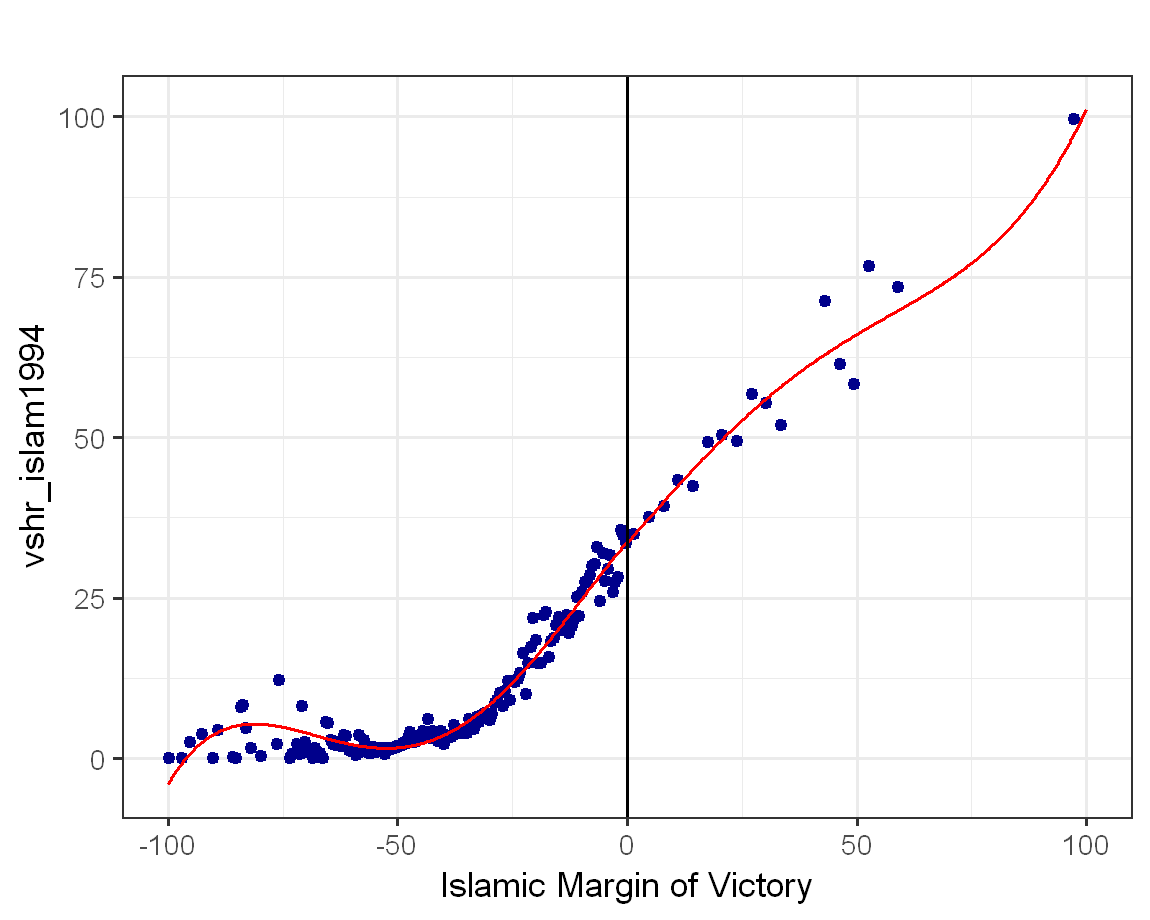

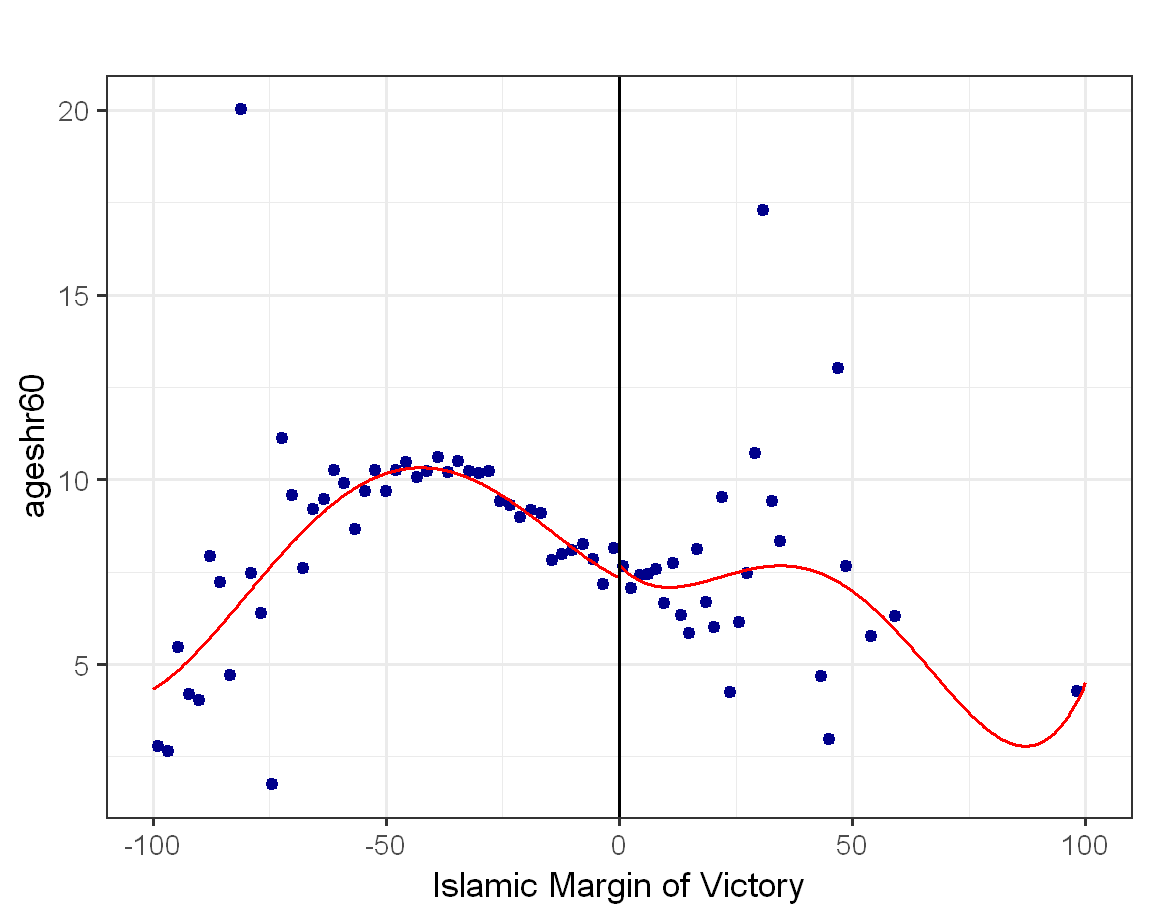

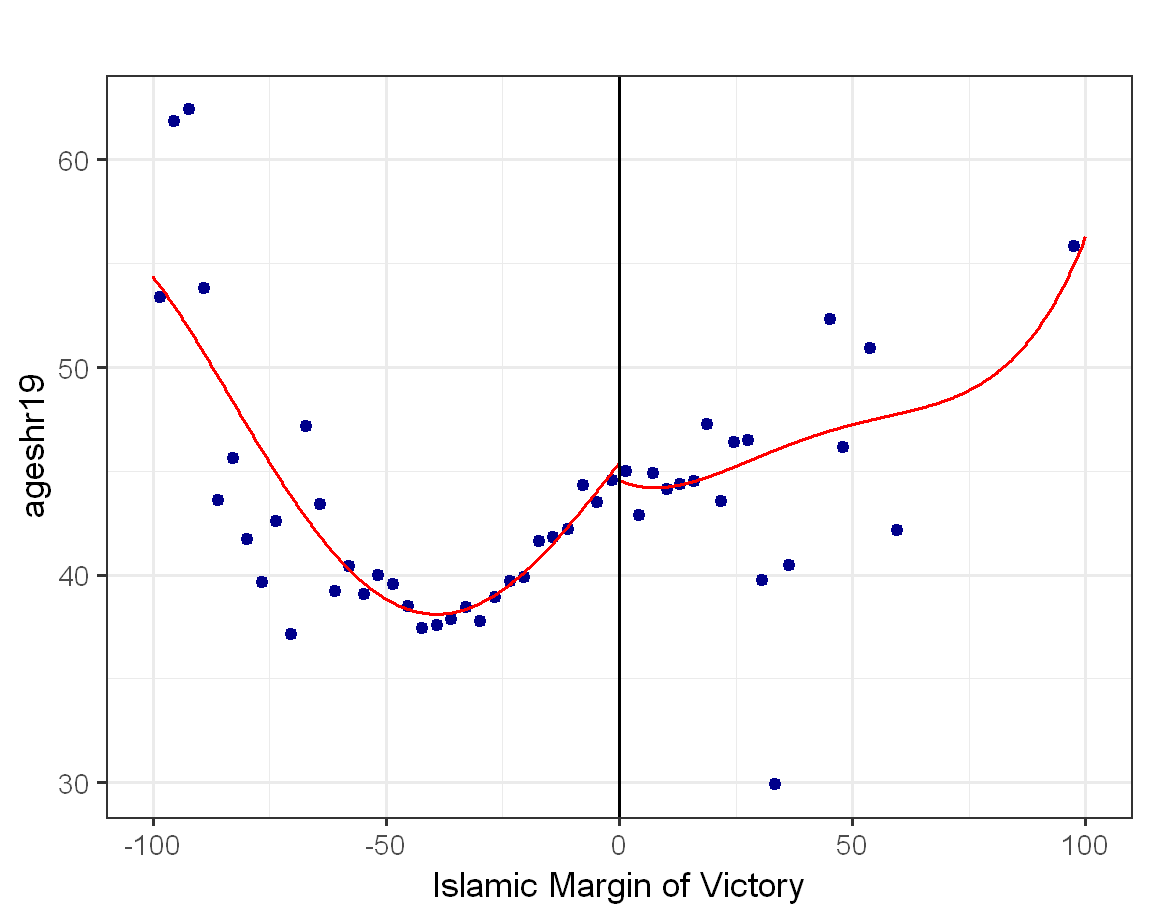

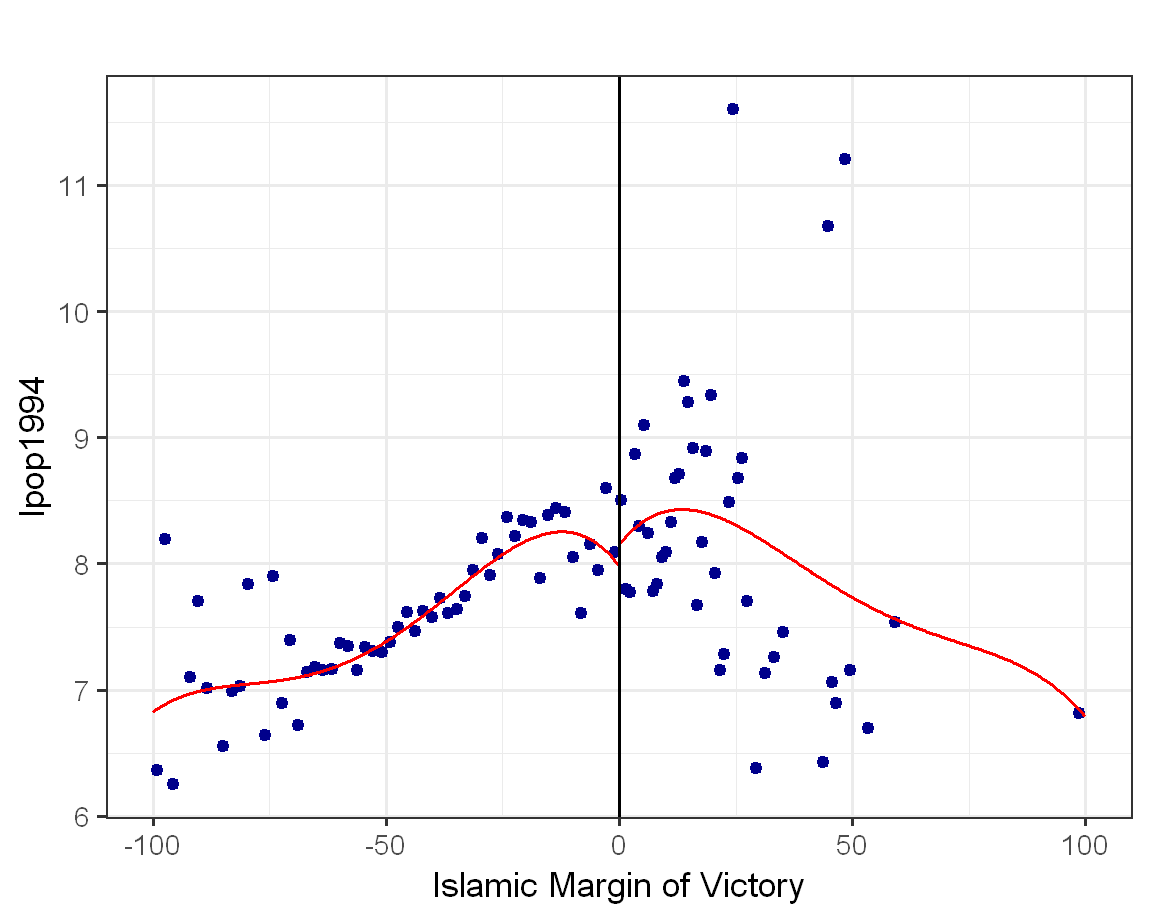

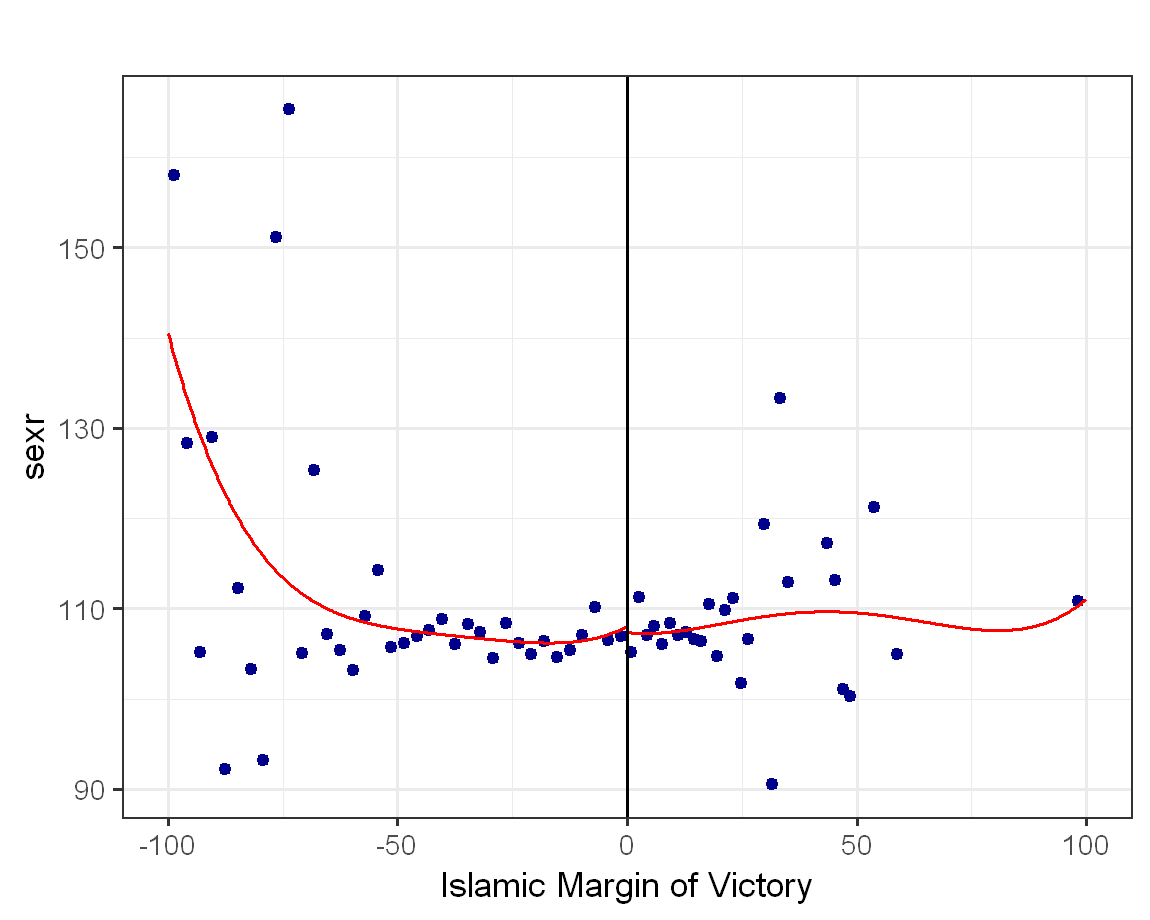

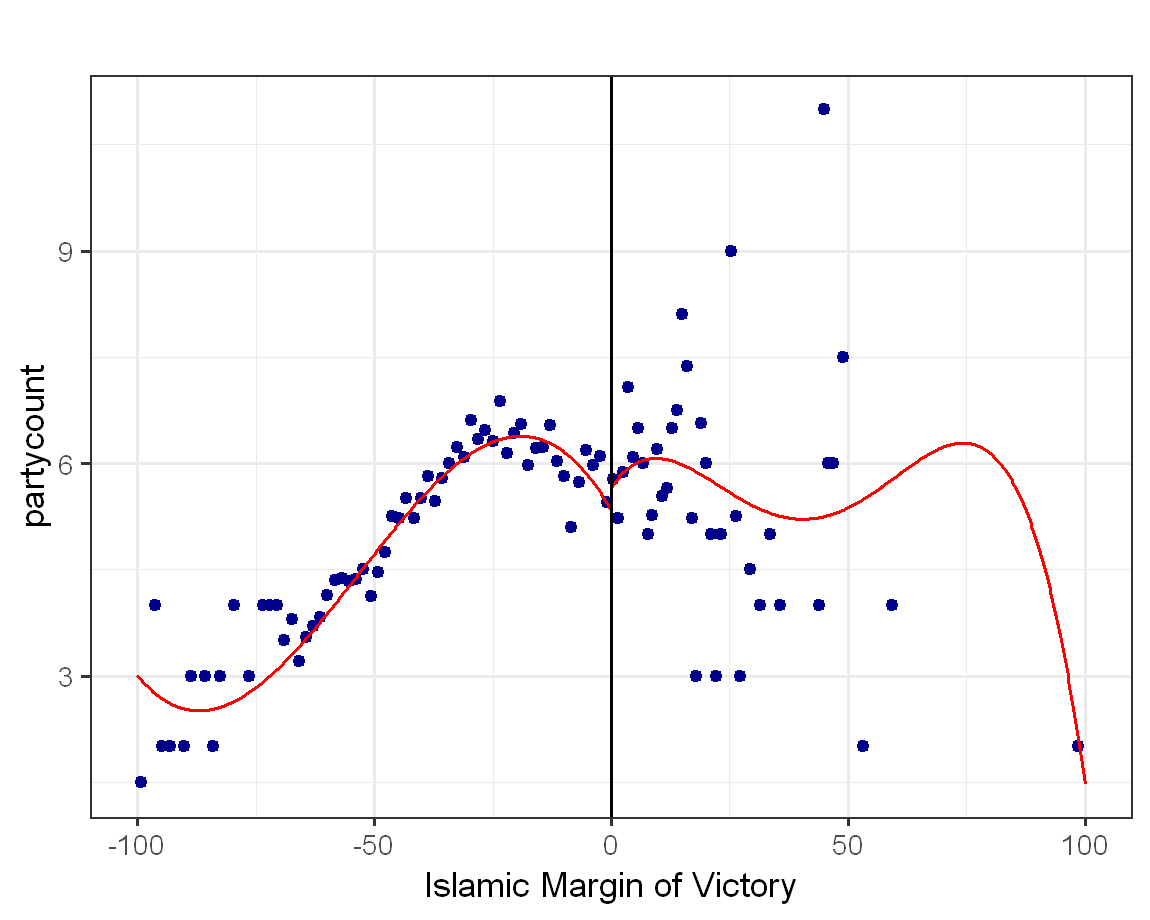

In [203]:
bw <- as.numeric(100)

plot_covariate <-rdplot(vshr_islam1994, X, h = bw, 
                        x.label = xlabel, y.label = "vshr_islam1994", title = "")

plot_ageshr60 <-rdplot(ageshr60, X, h = bw, 
                       x.label = xlabel, y.label = "ageshr60", title = "")

plot_ageshr19 <-rdplot(ageshr19, X, h = bw, 
                       x.label = xlabel, y.label = "ageshr19", title = "")

plot_lpop1994 <-rdplot(lpop1994, X, h = bw, 
                       x.label = xlabel, y.label = "lpop1994", title = "")

plot_sexr <-rdplot(sexr, X, h = bw, 
                   x.label = xlabel, y.label = "sexr", title = "")

plot_partycount <-rdplot(partycount, X, h = bw, 
                         x.label = xlabel, y.label = "partycount", title = "")

***

## RDD effect estimation and robustness checks

Can (and should) run different combinations of these estimation. 

The point is to show that the effect is not (too) sensitive to changes in the estimation procedure.

Here, we follow Table II Panel A (Women) in Meyersson, with some differences 
* We estimate most variants nonparametrically (Meyersson uses parametric estimators).
* Optimal bandwidth choice algorithm differs slightly (not important). 
* Esimate additional variants for illustration.


In [206]:
# Create matrix to store effects
effects <- matrix(, nrow = 5, ncol = 8)

### (1) Parametric estimation 

Parametric difference in means using all observations below and above cut-off (i.e. global estimation with maximum bandwidth). No covariates. 

$Y_i=\alpha+\theta D_i+U_i$

In [207]:
# Column (1)
out <- lm(Y ~ D)
out <- summ(out)
out
effects[1,1] <- out$coeftable[2,1]  # effect
effects[2,1] <- out$coeftable[2,2]  # se
effects[3,1] <- 2*pnorm(-abs(out$coeftable[2,1]/out$coeftable[2,2])) # pvalue 
effects[4,1] <- 100 # bandwidth left 
effects[5,1] <- 100 # bandwidth right 

MODEL INFO:
Observations: 2629
Dependent Variable: Y
Type: OLS linear regression 

MODEL FIT:
F(1,2627) = 20.20, p = 0.00
R² = 0.01
Adj. R² = 0.01 

Standard errors: OLS
------------------------------------------------
                     Est.   S.E.   t val.      p
----------------- ------- ------ -------- ------
(Intercept)         16.61   0.20    83.70   0.00
D                   -2.58   0.57    -4.49   0.00
------------------------------------------------

This is the raw difference between treated and control that what we saw in Table 1.

### (2) Parametric estimation with covariates 

Using all observations.

$Y_i=\alpha+\theta D_i+\sum_{k=1} ^K\beta_{2,k}\tilde{X}_{k,i}+U_i$

where $\tilde{X}_{k,i}$ are covariates (Meyersson also includes province fixed effects).  

This does not change underlying identifying assumptions, but controlling for covariates that are correlated with the potential outcomes may improve precision because residuals become smaller.

In [209]:
# Group covariates
covariates <- as.matrix(dplyr::select(data, lpop1994, 
            vshr_islam1994, partycount, ageshr60, ageshr19, 
            sexr, shhs, merkezi, merkezp, subbuyuk, buyuk))
covariates <- cbind(covariates)
covariates_names <- colnames(covariates)

# Column (2)
out <- lm(Y ~ D + covariates)
out <- summ(out)
out
effects[1,2] <- out$coeftable[2,1]
effects[2,2] <- out$coeftable[2,2] 
effects[3,2] <- 2*pnorm(-abs(out$coeftable[2,1]/out$coeftable[2,2]))
effects[4,2] <- 100
effects[5,2] <- 100

MODEL INFO:
Observations: 2629
Dependent Variable: Y
Type: OLS linear regression 

MODEL FIT:
F(12,2616) = 174.70, p = 0.00
R² = 0.44
Adj. R² = 0.44 

Standard errors: OLS
-------------------------------------------------------------
                                  Est.   S.E.   t val.      p
------------------------------ ------- ------ -------- ------
(Intercept)                      52.35   2.93    17.84   0.00
D                                 1.28   0.58     2.20   0.03
covariateslpop1994                0.73   0.24     3.10   0.00
covariatesvshr_islam1994         -0.09   0.01    -6.97   0.00
covariatespartycount             -0.50   0.11    -4.70   0.00
covariatesageshr60               -0.59   0.06    -9.63   0.00
covariatesageshr19               -0.83   0.03   -27.95   0.00
covariatessexr                   -0.04   0.01    -5.83   0.00
covariatesshhs                    0.48   0.08     6.15   0.00
covariatesmerkezi                 6.61   0.39    17.17   0.00
covariatesmerkezp     

Using all observations, covariates, and allowing for direct effect of running variable on $Y_i$ (not shown in Meyersson).

$Y_i=\alpha+\theta D_i+\beta_0(X_i-\bar{x})+\beta_1D_i(X_i-\bar{x})+\sum_{k=1} ^K\beta_{2,k}\tilde{X}_{k,i}+U_i$


In [210]:
D_X <- D * X
out <- lm(Y ~ D + X + D_X + covariates)
out <- summ(out)
out

MODEL INFO:
Observations: 2629
Dependent Variable: Y
Type: OLS linear regression 

MODEL FIT:
F(14,2614) = 151.32, p = 0.00
R² = 0.45
Adj. R² = 0.44 

Standard errors: OLS
-------------------------------------------------------------
                                  Est.   S.E.   t val.      p
------------------------------ ------- ------ -------- ------
(Intercept)                      56.01   3.11    18.00   0.00
D                                 1.36   0.66     2.06   0.04
X                                 0.05   0.02     3.49   0.00
D_X                              -0.05   0.04    -1.33   0.18
covariateslpop1994                0.71   0.24     3.04   0.00
covariatesvshr_islam1994         -0.15   0.02    -6.65   0.00
covariatespartycount             -0.68   0.12    -5.76   0.00
covariatesageshr60               -0.60   0.06    -9.70   0.00
covariatesageshr19               -0.83   0.03   -28.10   0.00
covariatessexr                   -0.04   0.01    -5.83   0.00
covariatesshhs        

### (3) Nonparametric estimation - Local linear regression 

$\min\sum_{i=1}^NK_h(X_i-\bar{x})[Y_i-\alpha-\theta  D_i-\beta_0(X_i-\bar{x})-\beta_1 D_i(X_i-\bar{x})]^2 $

where $K_h(\cdot)$ is the triangular kernel (recommended). 

Estimate separately to the left and to the right of cut-off to reduce boundary problems.

Using all observations (not shown in Meyersson).

In [211]:
out <- rdrobust(Y, X, 
                kernel = "triangular", scaleregul = 1, p = 1, h = 100)
summary(out)

Call: rdrobust

Number of Obs.                 2629
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.           2313         315
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                100.000     100.000
BW bias (b)                100.000     100.000
rho (h/b)                    1.000       1.000
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.549     0.897     0.612     0.541    [-1.209 , 2.307]     
        Robust         -         -     2.794     0.005     [0.986 , 5.625]     


Same with optimal bandwidth selection, i.e. use only observations within $[\underline{h},\bar{h}]$ around the cut-off.

Remember: Choosing the bandwidth around the cutoff is a tradeoff between efficiency (using more observations to increase precision) and consistency (getting the functional form of the direct effect right).

In [212]:
# Column (3) 
out <- rdrobust(Y, X, 
                kernel = "triangular", scaleregul = 1, p = 1, 
                bwselect = "mserd")

summary(out)
effects[1,3] <- out$Estimate[[1]]
effects[2,3] <- out$Estimate[[3]]
effects[3,3] <- out$pv[[1]]
effects[4,3] <- out$bws[[1]]
effects[5,3] <- out$bws[[2]]

Call: rdrobust

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            529         266
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 17.240      17.240
BW bias (b)                 28.576      28.576
rho (h/b)                    0.603       0.603
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.020     1.427     2.116     0.034     [0.223 , 5.816]     
        Robust         -         -     1.776     0.076    [-0.309 , 6.276]     


### (4) Nonparametric estimation - Local linear regression with covariates

Same as above but adding covariates. 

In [213]:
# Col (4) with covariates
out <- rdrobust(Y, X, covs = covariates, kernel = "triangular", 
                scaleregul = 1, p = 1, bwselect = "mserd")

summary(out)
effects[1,4] <- out$Estimate[[1]]
effects[2,4] <- out$Estimate[[3]]
effects[3,4] <- out$pv[[1]]
effects[4,4] <- out$bws[[1]]
effects[5,4] <- out$bws[[2]]

Call: rdrobust

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            421         237
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 13.776      13.776
BW bias (b)                 24.193      24.193
rho (h/b)                    0.569       0.569
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.006     1.043     2.883     0.004     [0.962 , 5.050]     
        Robust         -         -     2.641     0.008     [0.827 , 5.583]     


### (5) & (6) Nonparametric estimation - Vary bandwidth around cutoff 

Take half and twice the optimal bandwidth, on the left and the right of the cutoff, respectively. 

In [214]:
# Store h from previous estimation
bw_left <- as.numeric(out$bws[[1]])
bw_right <- as.numeric(out$bws[[2]])

bw_left
bw_right

[1] 13.77638

[1] 24.19298

In [215]:
# Column (5) with h/2
out = rdrobust(Y, X, h = c(bw_left/2, bw_right/2), 
               kernel = "triangular", p = 1)

summary(out)
effects[1,5] <- out$Estimate[[1]]
effects[2,5] <- out$Estimate[[3]]
effects[3,5] <- out$pv[[1]]
effects[4,5] <- out$bws[[1]]
effects[5,5] <- out$bws[[2]]

Call: rdrobust

Number of Obs.                 2629
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            207         222
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                  6.888      12.096
BW bias (b)                  6.888      12.096
rho (h/b)                    1.000       1.000
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.171     1.923     1.129     0.259    [-1.599 , 5.941]     
        Robust         -         -     0.950     0.342    [-2.889 , 8.319]     


In [216]:
# Column (6) with 2h
out = rdrobust(Y, X, h = c(bw_left*2, bw_right*2), kernel = "triangular", p = 1)

summary(out)
effects[1,6] <- out$Estimate[[1]] 
effects[2,6] <- out$Estimate[[3]] 
effects[3,6] <- out$pv[[1]]
effects[4,6] <- out$bws[[1]] 
effects[5,6] <- out$bws[[2]] 

Call: rdrobust

Number of Obs.                 2629
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            844         310
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 27.553      48.386
BW bias (b)                 27.553      48.386
rho (h/b)                    1.000       1.000
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     2.999     1.116     2.688     0.007     [0.813 , 5.185]     
        Robust         -         -     1.936     0.053    [-0.037 , 5.928]     


### (7) & (8) Nonparametric estimation - Higher order polynomials of $(X_i - x)$ 

Change the value of option `p`. 

In [217]:
# Column (7), quadratic
out = rdrobust(Y, X, covs = covariates, 
               kernel = "triangular", p = 2, bwselect = "mserd")

summary(out)
effects[1,7] <- out$Estimate[[1]]
effects[2,7] <- out$Estimate[[3]]
effects[3,7] <- out$pv[[1]]
effects[4,7] <- out$bws[[1]]
effects[5,7] <- out$bws[[2]]

Call: rdrobust

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            440         239
Order est. (p)                   2           2
Order bias  (q)                  3           3
BW est. (h)                 14.207      14.207
BW bias (b)                 20.651      20.651
rho (h/b)                    0.688       0.688
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.193     1.454     2.196     0.028     [0.343 , 6.042]     
        Robust         -         -     1.978     0.048     [0.030 , 6.386]     


In [218]:
# Column (8), cubic
out = rdrobust(Y, X, covs = covariates, 
               kernel = "triangular", p = 3, bwselect = "mserd")

summary(out)
effects[1,8] <- out$Estimate[[1]]
effects[2,8] <- out$Estimate[[3]]
effects[3,8] <- out$pv[[1]]
effects[4,8] <- out$bws[[1]]
effects[5,8] <- out$bws[[2]]

Call: rdrobust

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            518         262
Order est. (p)                   3           3
Order bias  (q)                  4           4
BW est. (h)                 16.755      16.755
BW bias (b)                 22.344      22.344
rho (h/b)                    0.750       0.750
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.608     1.757     2.054     0.040     [0.165 , 7.051]     
        Robust         -         -     1.895     0.058    [-0.125 , 7.452]     


### Compare estimates

In [219]:
rownames(effects) <- c("Effect", "SE", "P-value", "Bw left", "Bw right")
colnames(effects) <- c("(1) Par. ", "(2) Par. + cov. ", "(3) Nonpar.",
                             "(4) Nonpar.", "(5) Nonpar. 1/2*h", "(6) Nonpar. 2*h",
                             "(7) Nonpar. p=2","(8) Nonpar. p=3")
xtable(effects, digits=3)

,(1) Par.,(2) Par. + cov.,(3) Nonpar.,(4) Nonpar.,(5) Nonpar. 1/2*h,(6) Nonpar. 2*h,(7) Nonpar. p=2,(8) Nonpar. p=3
Effect,-2.577,1.278,3.020,3.006,2.171,2.999,3.193,3.608
SE,0.573,0.581,1.427,1.043,1.923,1.116,1.454,1.757
P-value,0.000,0.028,0.034,0.004,0.259,0.007,0.028,0.040
Bw left,100.000,100.000,17.240,13.776,6.888,27.553,14.207,16.755
Bw right,100.000,100.000,28.576,24.193,6.888,27.553,20.651,22.344


### No sorting in covariates: covariates as outcome

Run same RDD analysis but with covariates as outcomes. 

This part serves for formal inference regarding sorting on covariates. 

In [220]:
covariate_rd <- function(covariate) {
    out <- rdrobust(covariate, X)
    summary(out)
    list(effect=out$Estimate[[1]], 
         se=out$Estimate[[3]],
         pv=out$pv[[1]])  
}

covariate_out <- apply(covariates, 2, covariate_rd)

Call: rdrobust

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of Obs.            400         233
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 13.320      13.320
BW bias (b)                 21.368      21.368
rho (h/b)                    0.623       0.623
Unique Obs.                   2311         315

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     0.012     0.278     0.045     0.964    [-0.532 , 0.557]     
        Robust         -         -     0.001     0.999    [-0.644 , 0.645]     
Call: rdrobust

Number of Obs.                 2629
BW type                       mserd
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2314         315
Eff. Number of

In [221]:
# convert list to table
covariate_table <- rbindlist(covariate_out)
rownames(covariate_table)<- colnames(covariates)

print("RD effect estimates for covariates")
xtable(covariate_table, digits=3)

[1] "RD effect estimates for covariates"


,effect,se,pv
lpop1994,0.012,0.278,0.964
vshr_islam1994,0.603,1.479,0.683
partycount,-0.168,0.478,0.726
ageshr60,-0.217,0.473,0.647
ageshr19,0.041,1.172,0.972
sexr,1.731,1.886,0.359
shhs,-0.001,0.364,0.998
merkezi,-0.067,0.089,0.449
merkezp,0.029,0.037,0.431
subbuyuk,-0.016,0.039,0.682


***

## Extensions

### Mechanisms and effect heterogeneity

Table V Panel C, Meyersson 

In [222]:
# Restrict sample to bandwidth of 25
# Only after, split at median of Islam vote share
median <- as.numeric(median(vshr_islam1994[abs(X)<=25]))
median

[1] 26.02189

In [223]:
# Column (1), above median 
out = rdrobust(Y[vshr_islam1994 >= median], X[vshr_islam1994 >= median], 
               kernel = "triangular", p = 1, h = 25)
summary(out)

# Column (2), below median 
out = rdrobust(Y[vshr_islam1994 < median], X[vshr_islam1994 < median], 
               kernel = "triangular", p = 1, h = 25)
summary(out)

Call: rdrobust

Number of Obs.                  557
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                 260         297
Eff. Number of Obs.            249         276
Order est. (p)                   1           1
Order bias  (q)                  2           2
BW est. (h)                 25.000      25.000
BW bias (b)                 25.000      25.000
rho (h/b)                    1.000       1.000
Unique Obs.                    260         297

        Method     Coef. Std. Err.         z     P>|z|      [ 95% C.I. ]       
  Conventional     3.618     1.430     2.530     0.011     [0.815 , 6.420]     
        Robust         -         -     1.620     0.105    [-0.695 , 7.304]     
Call: rdrobust

Number of Obs.                 2072
BW type                      Manual
Kernel                   Triangular
VCE method                       NN

Number of Obs.                2054          18
Eff. Number of

### Donut hole approach 

See how the effect changes if we exclude different ranges of observations close to the cut-off.

Goal: alleviate potential biases from manipulation of running variable around the cut-off. 

In [224]:
donut_range <- as.matrix(c(0, 0.1, 0.2, 0.3, 0.4, 0.5))

donut_tests <- function(donut) {          

        if (is.numeric(donut)) {
            out = rdrobust(Y[abs(X) >= donut], X[abs(X) >= donut], 
                       kernel = "triangular", p = 1)
            list(donut=donut, effect=out$Estimate[[1]], se=out$Estimate[[3]])  
        } else {
            print("ERROR - Donut range must be numeric")
        }

}

donut_out <- apply(donut_range, 1, donut_tests)


# convert list to table
donut_table <- rbindlist(donut_out)
donut_table

donut,effect,se
<dbl>,<dbl>,<dbl>
0.0,3.019526,1.427053
0.1,3.080773,1.405735
0.2,3.337186,1.469769
0.3,3.414149,1.516897
0.4,3.285757,1.436078
0.5,3.745077,1.495280
